In [6]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode


import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_excel(r"C:\Users\DELL\Downloads\CombineData.xlsx")

In [25]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 420 Rows and 48 Columns in our dataframe


,State/UT,Year,population(total),Rural,Urban,Tot_Male,Tot_Female,Polulation_Literacy,Male_Literacy,Female_Litracy,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,tot_crimes_sc,total crime against women,Total crimes against STs,Total crime against children,Crime Rate
0,A& N ISLANDS,2001,356152,239954,116198,192972,163180,253135.0,146831.0,106304,...,0,0,323,658,1386,0,34.0,1.0,0.0,184.752578
1,ANDHRA PRADESH,2001,76210007,55401067,20808940,38527413,37682594,39934323.0,23444788.0,16489535,...,7,7400,34344,130089,278982,2933,13669.0,512.0,270.0,170.698055
2,ARUNACHAL PRADESH,2001,1097968,870087,227881,579941,518027,484785.0,303281.0,181504,...,0,0,618,2342,5243,0,180.0,72.0,0.0,213.303120
3,ASSAM,2001,26655528,23216288,3439240,13777037,12878491,14015354.0,8188697.0,5826657,...,0,2010,9315,36877,81418,6,4048.0,0.0,18.0,138.346537
4,BIHAR,2001,82998509,74316709,8681800,43243795,39754714,31109577.0,20644376.0,10465201,...,83,2406,36667,88432,189612,1303,4489.0,83.0,83.0,106.546492


In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State/UT                                             420 non-null    object 
 1   Year                                                 420 non-null    int64  
 2   population(total)                                    420 non-null    int64  
 3   Rural                                                420 non-null    int64  
 4   Urban                                                420 non-null    int64  
 5   Tot_Male                                             420 non-null    int64  
 6   Tot_Female                                           420 non-null    int64  
 7   Polulation_Literacy                                  420 non-null    float64
 8   Male_Literacy                                        420 non-null    f

In [31]:
## Columns of the dataset
df.columns

Index(['State/UT', 'Year', 'population(total)', 'Rural', 'Urban', 'Tot_Male',
       'Tot_Female', 'Polulation_Literacy', 'Male_Literacy', 'Female_Litracy',
       'Litracy_rate', 'Area (km2)', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes', 'tot_crimes

In [27]:
(df['State/UT'].unique())

array(['A& N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [28]:
len(df['State/UT'].unique())

35

In [29]:
df.head()

,State/UT,Year,population(total),Rural,Urban,Tot_Male,Tot_Female,Polulation_Literacy,Male_Literacy,Female_Litracy,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,tot_crimes_sc,total crime against women,Total crimes against STs,Total crime against children,Crime Rate
0,A& N ISLANDS,2001,356152,239954,116198,192972,163180,253135.0,146831.0,106304,...,0,0,323,658,1386,0,34.0,1.0,0.0,184.752578
1,ANDHRA PRADESH,2001,76210007,55401067,20808940,38527413,37682594,39934323.0,23444788.0,16489535,...,7,7400,34344,130089,278982,2933,13669.0,512.0,270.0,170.698055
2,ARUNACHAL PRADESH,2001,1097968,870087,227881,579941,518027,484785.0,303281.0,181504,...,0,0,618,2342,5243,0,180.0,72.0,0.0,213.303120
3,ASSAM,2001,26655528,23216288,3439240,13777037,12878491,14015354.0,8188697.0,5826657,...,0,2010,9315,36877,81418,6,4048.0,0.0,18.0,138.346537
4,BIHAR,2001,82998509,74316709,8681800,43243795,39754714,31109577.0,20644376.0,10465201,...,83,2406,36667,88432,189612,1303,4489.0,83.0,83.0,106.546492


In [30]:
df.isnull().sum()

State/UT                                                0
Year                                                    0
population(total)                                       0
Rural                                                   0
Urban                                                   0
Tot_Male                                                0
Tot_Female                                              0
Polulation_Literacy                                     0
Male_Literacy                                           0
Female_Litracy                                          0
Litracy_rate                                            0
Area (km2)                                              0
MURDER                                                  0
ATTEMPT TO MURDER                                       0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               0
RAPE                                                    0
CUSTODIAL RAPE                                          0
OTHER RAPE    

In [32]:
df['Total crimes against STs'].describe()

count     387.000000
mean      185.077519
std       393.275773
min         0.000000
25%         0.000000
50%         6.000000
75%       209.500000
max      2894.000000
Name: Total crimes against STs, dtype: float64

In [34]:
df['Total crimes against STs']=df['Total crimes against STs'].fillna(df['Total crimes against STs'].mean())

In [35]:
df['Total crime against children'].describe()

count     418.000000
mean      587.267943
std      1036.458881
min         0.000000
25%        26.000000
50%       103.000000
75%       632.250000
max      6033.000000
Name: Total crime against children, dtype: float64

In [36]:
df['Total crime against children']=df['Total crime against children'].fillna(df['Total crime against children'].mean())

In [37]:
df['total crime against women']=df['total crime against women'].fillna(df['total crime against women'].mean())

In [38]:
df.isnull().sum().sum()

0

In [39]:
df['State/UT'].value_counts()

A& N ISLANDS         12
PUDUCHERRY           12
MAHARASHTRA          12
MANIPUR              12
MEGHALAYA            12
MIZORAM              12
NAGALAND             12
ODISHA               12
PUNJAB               12
LAKSHADWEEP          12
RAJASTHAN            12
SIKKIM               12
TAMIL NADU           12
TRIPURA              12
UTTAR PRADESH        12
UTTARAKHAND          12
MADHYA PRADESH       12
KERALA               12
ANDHRA PRADESH       12
DAMAN & DIU          12
ARUNACHAL PRADESH    12
ASSAM                12
BIHAR                12
CHANDIGARH           12
CHHATTISGARH         12
D & N HAVELI         12
DELHI                12
KARNATAKA            12
GOA                  12
GUJARAT              12
HARYANA              12
HIMACHAL PRADESH     12
JAMMU & KASHMIR      12
JHARKHAND            12
WEST BENGAL          12
Name: State/UT, dtype: int64

In [40]:
df.describe()

,Year,population(total),Rural,Urban,Tot_Male,Tot_Female,Polulation_Literacy,Male_Literacy,Female_Litracy,Litracy_rate,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,tot_crimes_sc,total crime against women,Total crimes against STs,Total crime against children,Crime Rate
count,420.000000,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,3.210516e+07,2.325755e+07,8.964941e+06,1.659190e+07,1.560647e+07,1.901633e+07,1.109371e+07,7.963801e+06,74.304929,...,2.123810,2385.038095,23342.764286,57005.423810,123764.880952,14884.821429,5141.299270,185.077519,587.267943,234.148195
std,3.456169,4.090185e+07,3.099496e+07,1.152126e+07,2.116180e+07,1.960728e+07,2.336704e+07,1.379373e+07,9.675254e+06,9.942087,...,8.914278,3665.682348,29318.488594,66190.228036,143105.441854,91151.189568,6527.890804,377.471210,1033.982273,868.709314
min,2001.000000,6.065000e+04,3.368300e+04,2.696700e+04,3.113100e+04,2.951900e+04,4.468300e+04,2.451100e+04,2.017200e+04,47.000000,...,0.000000,0.000000,5.000000,31.000000,72.000000,0.000000,0.000000,0.000000,0.000000,18.551635
25%,2003.750000,1.302120e+06,7.259828e+05,5.533638e+05,6.866452e+05,6.526302e+05,8.984955e+05,4.681158e+05,4.343975e+05,66.382500,...,0.000000,35.000000,693.750000,2408.500000,5390.250000,0.000000,134.750000,0.000000,26.000000,115.283230
50%,2006.500000,1.507539e+07,8.597313e+06,3.753114e+06,8.333013e+06,7.219828e+06,1.063014e+07,6.315500e+06,4.422024e+06,74.495000,...,0.000000,463.500000,10414.500000,30116.500000,65035.500000,23.500000,2617.000000,12.000000,104.000000,182.181858
75%,2009.250000,5.705401e+07,3.649124e+07,1.504703e+07,2.947709e+07,2.766350e+07,3.261374e+07,2.000440e+07,1.341985e+07,82.187500,...,0.000000,3025.000000,41774.750000,109178.500000,232218.750000,710.500000,7459.500000,185.077519,628.750000,224.555786
max,2012.000000,2.022266e+08,1.597836e+08,4.826007e+07,1.070925e+08,9.666648e+07,1.188892e+08,7.041848e+07,4.847072e+07,94.500000,...,83.000000,16076.000000,124176.000000,220335.000000,472008.000000,653748.000000,30585.000000,2894.000000,6033.000000,17675.007690


Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

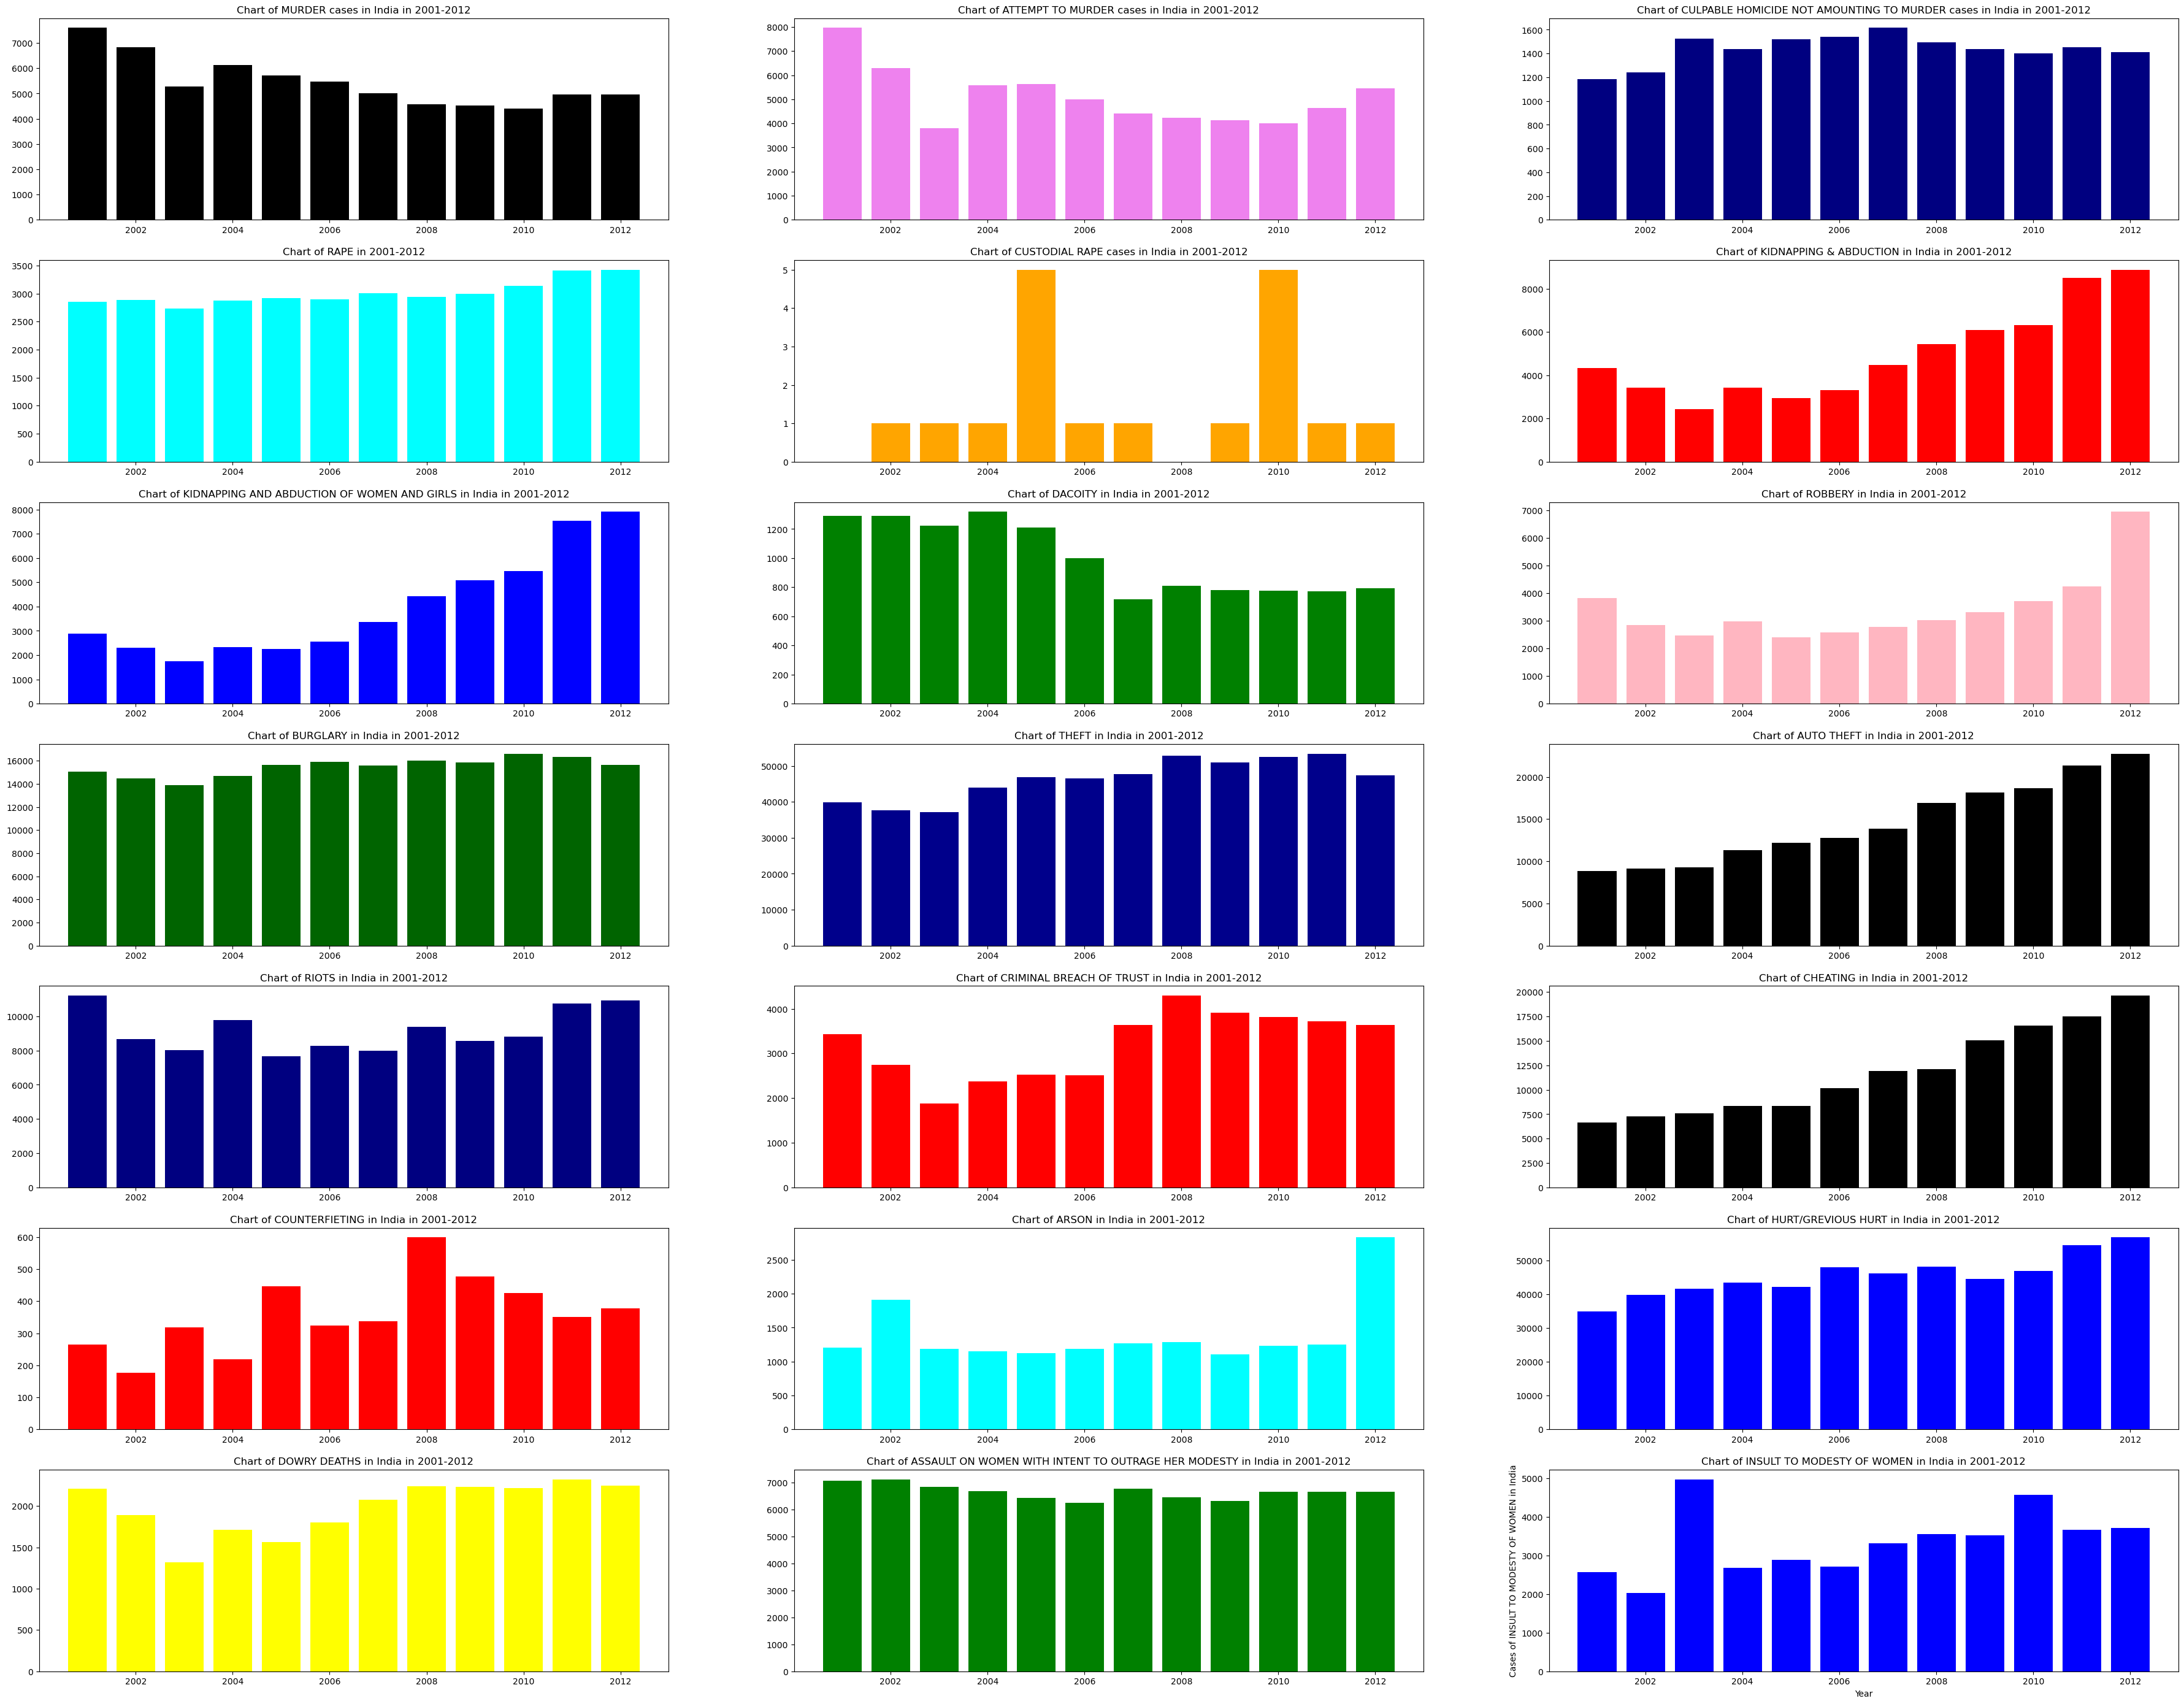

In [41]:
#Bar charts of every crime over time from the year 2001 to 2012 
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(df['Year'], df['MURDER'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of MURDER in India') #Y-axis

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(df['Year'], df['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #Y-axis

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(df['Year'], df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #Y-axis

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(df['Year'], df['RAPE'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RAPE in India') #Y-axis

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(df['Year'], df['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CUSTODIAL RAPE in India') #Y-axis

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(df['Year'], df['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #Y-axis

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India in 2001-2012")
axes[2,0].bar(df['Year'], df['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India') #Y-axis


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(df['Year'], df['DACOITY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DACOITY in India') #Y-axis

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(df['Year'], df['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ROBBERY in India') #Y-axis

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(df['Year'], df['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of BURGLARY in India') #Y-axis


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(df['Year'], df['THEFT'], color = 'darkblue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of THEFT in India') #Y-axis



axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(df['Year'], df['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of AUTO THEFT in India') #Y-axis


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(df['Year'], df['RIOTS'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RIOTS') #Y-axis

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(df['Year'], df['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #Y-axis


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(df['Year'], df['CHEATING'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CHEATING in India') #Y-axis

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(df['Year'], df['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of COUNTERFIETING in India') #Y-axis

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(df['Year'], df['ARSON'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ARSON in India') #Y-axis


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(df['Year'], df['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #Y-axis

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(df['Year'], df['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DOWRY DEATHS in India') #Y-axis

axes[6,1].set_title("Chart of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India in 2001-2012")
axes[6,1].bar(df['Year'], df['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India') #Y-axis

axes[6,2].set_title("Chart of INSULT TO MODESTY OF WOMEN in India in 2001-2012")
axes[6,2].bar(df['Year'], df['INSULT TO MODESTY OF WOMEN'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #Y-axis

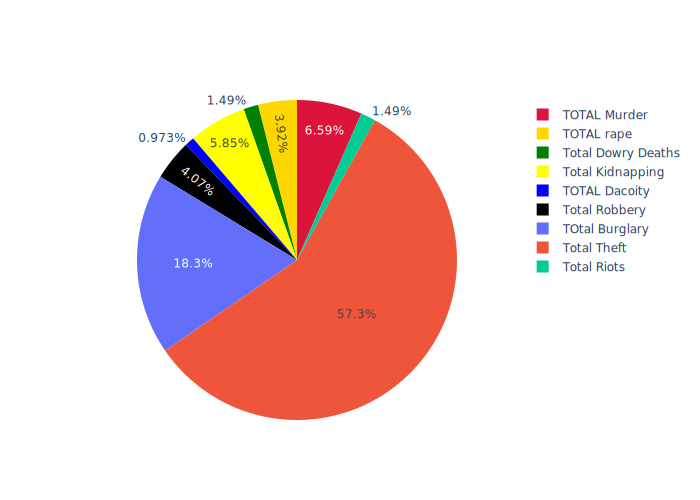

In [42]:
tot_murder= df['MURDER'].sum()
tot_rape= df['RAPE'].sum()
tot_dowrydeaths = df['DOWRY DEATHS'].sum()

tot_kidnap= df['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= df['DACOITY'].sum()
tot_robbery = df['ROBBERY'].sum()
tot_burglary= df['BURGLARY'].sum()
tot_theft= df['THEFT'].sum()
tot_riots = df['DOWRY DEATHS'].sum()

crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State/UT', y='Lit_rate',data=df)
plt.xticks(rotation='90')
plt.savefig("1.jpg")
plt.show()

ValueError: Could not interpret input 'Lit_rate'

<Figure size 1500x500 with 0 Axes>

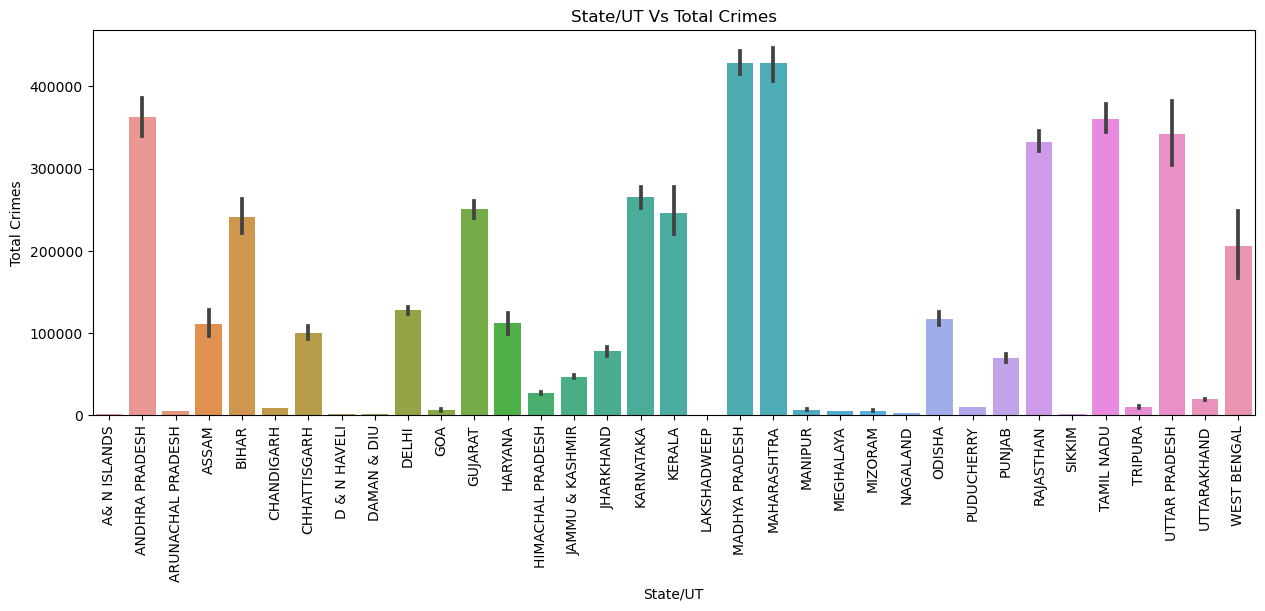

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total Crimes'])
plt.xticks(rotation='90')
plt.title('State/UT Vs Total Crimes')
plt.savefig("2.jpg")
plt.show()

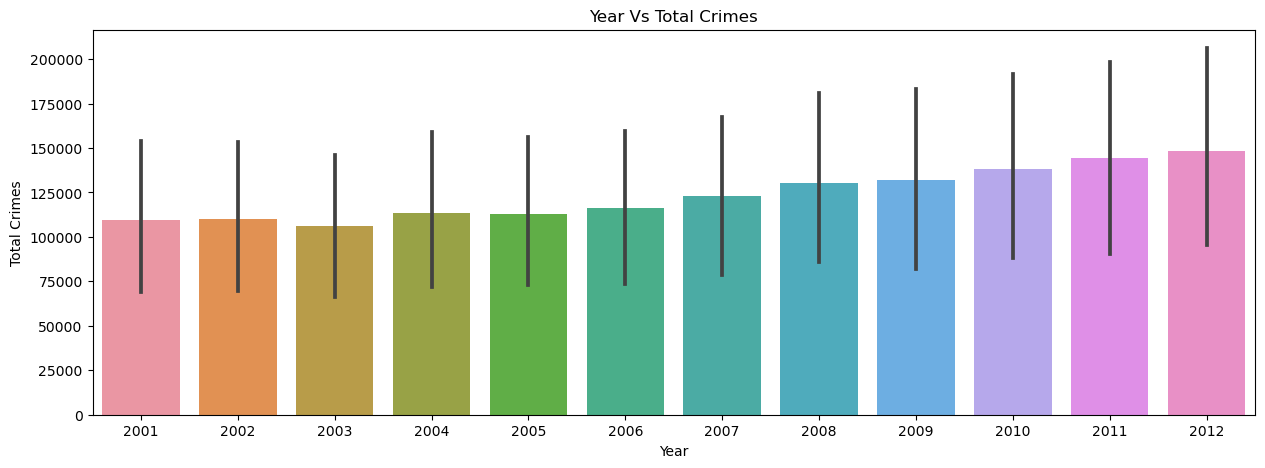

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Total Crimes'])
plt.title('Year Vs Total Crimes')
plt.savefig("3.jpg")
plt.show()

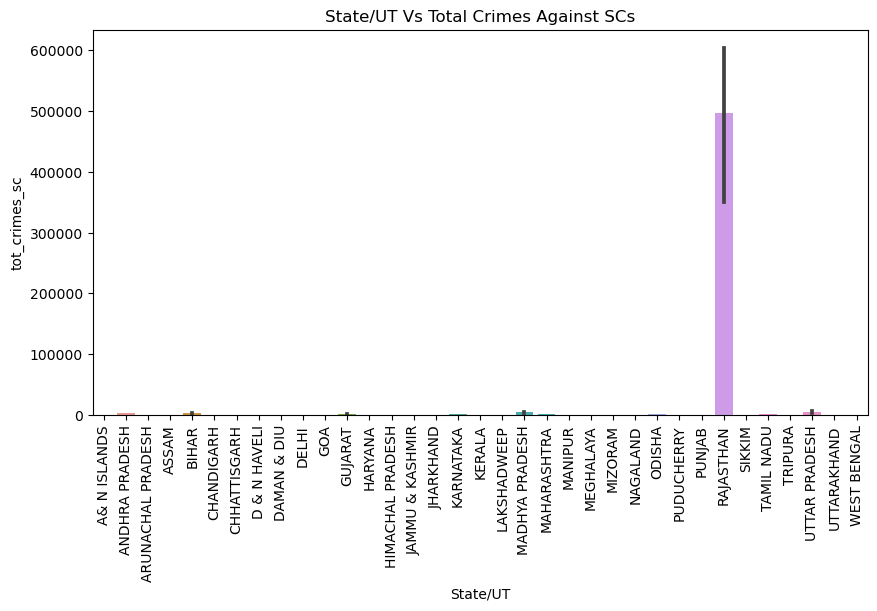

In [47]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['State/UT'], y=df['tot_crimes_sc'])
plt.xticks(rotation='90')
plt.title('State/UT Vs Total Crimes Against SCs')
plt.savefig("4.jpg")
plt.show()

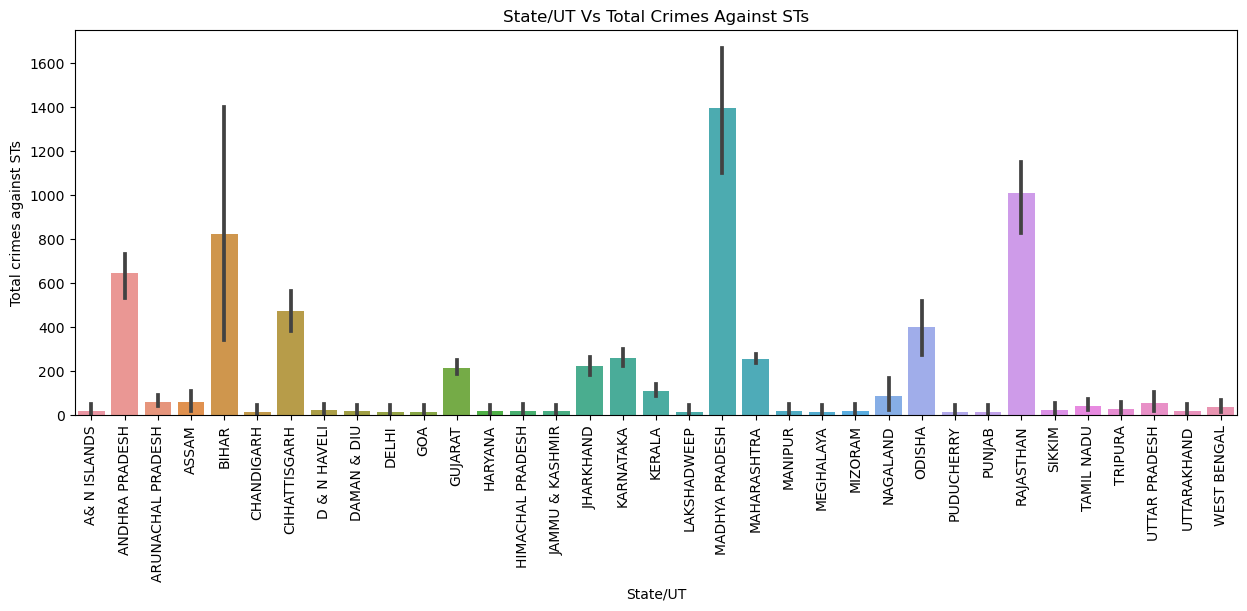

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crimes against STs'])
plt.xticks(rotation='90')
plt.title('State/UT Vs Total Crimes Against STs')
plt.savefig("5.jpg")
plt.show()

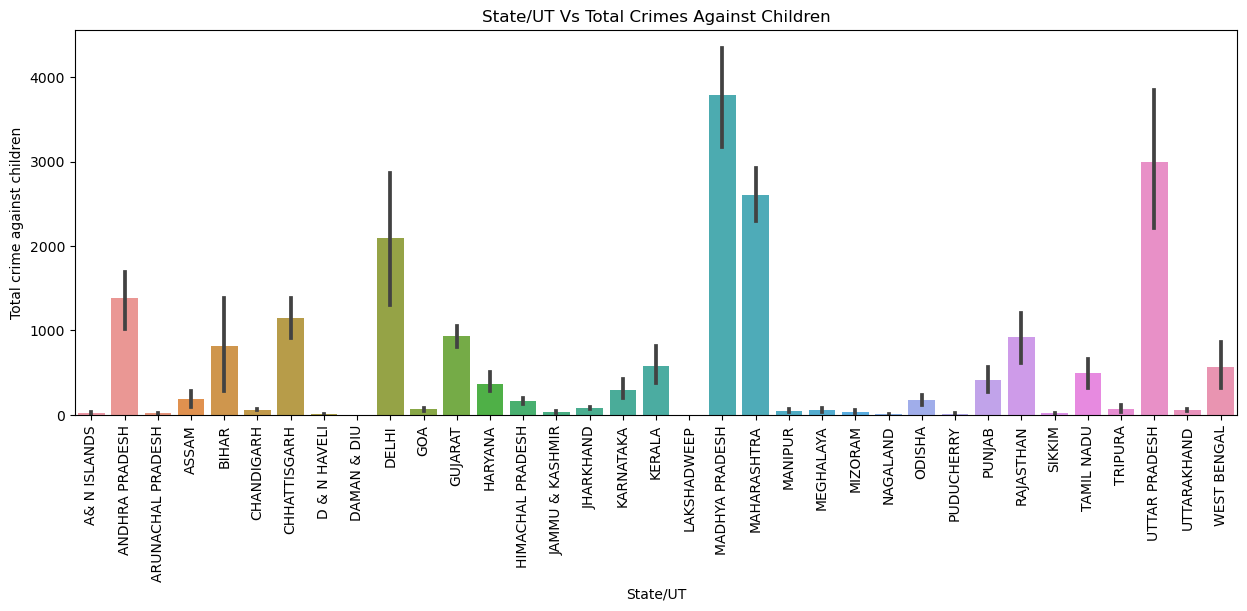

In [49]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crime against children'])
plt.xticks(rotation='90')
plt.title('State/UT Vs Total Crimes Against Children')
plt.savefig("6.jpg")
plt.show()

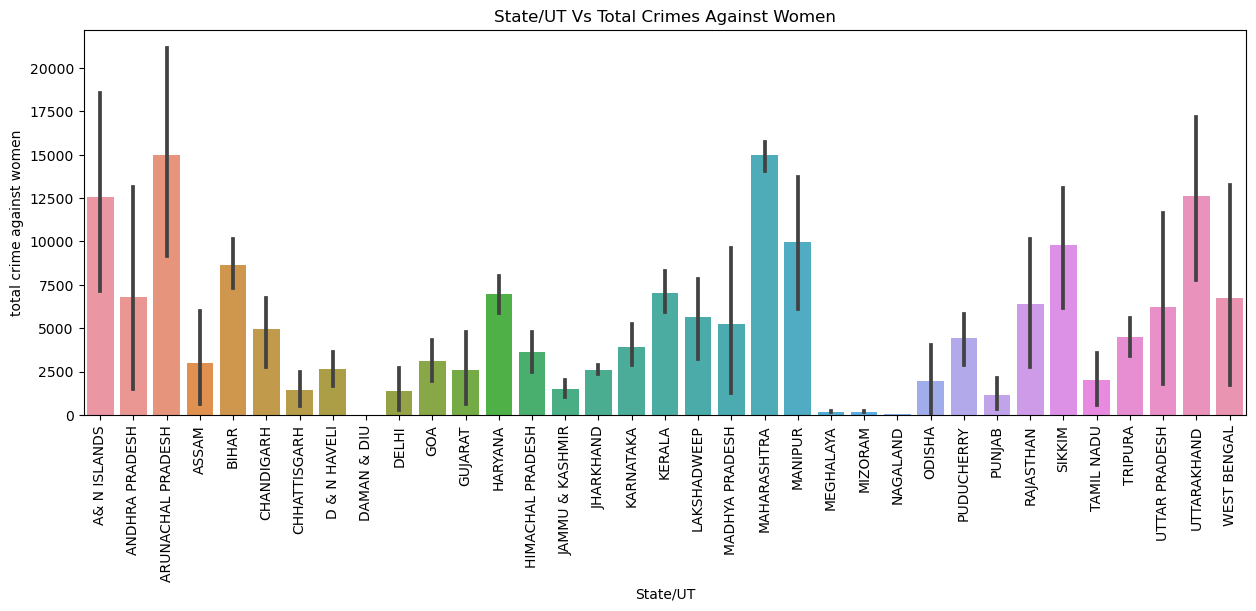

In [50]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['total crime against women'])
plt.xticks(rotation='90')
plt.title('State/UT Vs Total Crimes Against Women')
plt.savefig("7.jpg")
plt.show()

In [56]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Lit_rate'])
plt.xticks(rotation='90')
plt.title('Year VS Litercay Rate')
plt.savefig("8.jpg")
plt.show()

KeyError: 'Lit_rate'

<Figure size 1500x500 with 0 Axes>

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['P_LIT'])
plt.xticks(rotation='90')
plt.title('YEAR VS POPULATIN LITERACY')
plt.savefig("9.jpg")
plt.show()

KeyError: 'P_LIT'

<Figure size 1500x500 with 0 Axes>

In [55]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['M_LIT'])
plt.xticks(rotation='90')
plt.title('Year VS Male Literacy')
plt.savefig("10.jpg")
plt.show()

KeyError: 'M_LIT'

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['F_LIT'])
plt.xticks(rotation='90')
plt.title('Year Vs Female Literacy')
plt.savefig("11.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['population(total)'], y=df['P_LIT'],hue=df['State/UT'])
plt.xlabel('Population Total')
plt.ylabel('Population Literacy')
plt.title('Population VS Litercay')
plt.savefig("11.jpg")
plt.show()

In [ ]:
new_df=df[['State/UT','Year','Lit_rate', 'Total Crimes', 'tot_crimes_sc', 'total crime against women',
       'Total crimes against STs','Total crime against children']]
new_df

In [ ]:
new_df.corr()

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(new_df.corr(),annot=True)
plt.savefig('heatmap1.jpg')
plt.show()

In [58]:
import plotly.io as pio
pio.renderers.default = 'svg'


import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [57]:
#plotting scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total Crimes'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.title('Literacy Rate VS Total Crimes')
plt.savefig("12.jpg")
plt.show()

KeyError: 'Lit_rate'

<Figure size 1500x800 with 0 Axes>

In [ ]:
## Literacy Rate VS Tot Crimes SC
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['tot_crimes_sc'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against SC')
plt.title('Literact Rate VS Total Crimes Against SC')
plt.savefig("13.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['total crime against women'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against Women')
plt.title('Literact Rate VS Total Crimes Against WOmen')
plt.savefig("14.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total crimes against STs'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against STs')
plt.title('Literact Rate VS Total Crimes Against STs')
plt.savefig("15.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total crime against children'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against children')
plt.title('Literact Rate VS Total Crimes Against Children')
plt.savefig("16.jpg")

plt.show()

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="ATTEMPT TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CUSTODIAL RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="KIDNAPPING & ABDUCTION", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="DACOITY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="ROBBERY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="BURGLARY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [7]:
fig = px.scatter(df, x="Lit_rate", y="THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

NameError: name 'df' is not defined

In [8]:
fig = px.scatter(df, x="Lit_rate", y="AUTO THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

NameError: name 'df' is not defined

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="RIOTS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CRIMINAL BREACH OF TRUST", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CHEATING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="COUNTERFIETING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="ARSON", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="HURT/GREVIOUS HURT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="DOWRY DEATHS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="INSULT TO MODESTY OF WOMEN", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CRUELTY BY HUSBAND OR HIS RELATIVES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="CAUSING DEATH BY NEGLIGENCE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
fig = px.scatter(df, x="Lit_rate", y="OTHER IPC CRIMES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

In [ ]:
#selecting d/f states/UT for analysis
df_states=df[['State/UT','Year','Crime Rate']]

In [9]:
# Making data set for different state
#Selecting A& N Island only
select_andman = df_states.loc[df['State/UT'] == 'A& N ISLANDS']
select_andhra = df_states.loc[df['State/UT'] == 'ANDHRA PRADESH']
select_arunachal = df_states.loc[df['State/UT'] == 'ARUNACHAL PRADESH']
select_assam4 = df_states.loc[df['State/UT'] == 'ASSAM'] 
select_bihar = df_states.loc[df['State/UT'] == 'BIHAR'] 
select_chandigarh = df_states.loc[df['State/UT'] == 'CHANDIGARH']
select_chhatisgarh = df_states.loc[df['State/UT'] == 'CHHATTISGARH']
select_haveli = df_states.loc[df['State/UT'] == 'D & N HAVELI']
select_daman = df_states.loc[df['State/UT'] == 'DAMAN & DIU']
select_delhi = df_states.loc[df['State/UT'] == 'DELHI']  
select_goa = df_states.loc[df['State/UT'] == 'GOA']
select_gujarat = df_states.loc[df['State/UT'] == 'GUJARAT']
select_haryana = df_states.loc[df['State/UT'] == 'HARYANA']
select_himachal = df_states.loc[df['State/UT'] == 'HIMACHAL PRADESH']
select_jk = df_states.loc[df['State/UT'] == 'JAMMU & KASHMIR']
select_jharkhand = df_states.loc[df['State/UT'] == 'JHARKHAND']
select_karnataka = df_states.loc[df['State/UT'] == 'KARNATAKA'] 

select_kerala= df_states.loc[df['State/UT'] == 'KERALA'] 
select_lakshdweep= df_states.loc[df['State/UT'] == 'LAKSHADWEEP']
select_mp= df_states.loc[df['State/UT'] == 'MADHYA PRADESH']
select_maharashtra = df_states.loc[df['State/UT'] == 'MAHARASHTRA']  
select_manipur= df_states.loc[df['State/UT'] == 'MANIPUR'] 
select_meghalaya = df_states.loc[df['State/UT'] == 'MEGHALAYA']
select_mizoram = df_states.loc[df['State/UT'] == 'MIZORAM'] 
select_nagaland= df_states.loc[df['State/UT'] == 'NAGALAND']
select_odisha= df_states.loc[df['State/UT'] == 'ODISHA']
select_puducherry = df_states.loc[df['State/UT'] == 'PUDUCHERRY']
select_punjab = df_states.loc[df['State/UT'] == 'PUNJAB']
select_rajasthan = df_states.loc[df['State/UT'] == 'RAJASTHAN']
select_sikkim = df_states.loc[df['State/UT'] == 'SIKKIM']
select_tamilnadu = df_states.loc[df['State/UT'] == 'TAMIL NADU']
select_tripura= df_states.loc[df['State/UT'] == 'TRIPURA']
select_up = df_states.loc[df['State/UT'] == 'UTTAR PRADESH']
select_uk= df_states.loc[df['State/UT'] == 'UTTARAKHAND']
select_wb= df_states.loc[df['State/UT'] == 'WEST BENGAL']

NameError: name 'df_states' is not defined

In [10]:
fig = px.line(select_andman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

NameError: name 'select_andman' is not defined

In [11]:
fig = px.line(select_andhra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

NameError: name 'select_andhra' is not defined

In [12]:
fig = px.line(select_arunachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

NameError: name 'select_arunachal' is not defined

In [ ]:
fig = px.line(select_assam4, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_bihar, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_chandigarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_chhatisgarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_haveli, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_daman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_delhi, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_goa, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_gujarat, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_haryana, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_himachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_jk, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_jharkhand, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_karnataka, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_kerala, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_lakshdweep, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_mp, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_maharashtra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_manipur, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_meghalaya, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_mizoram, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_nagaland, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_odisha, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_puducherry, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_punjab, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_rajasthan, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_sikkim, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_tamilnadu, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_tripura, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_up, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_uk, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
fig = px.line(select_wb, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

In [ ]:
df_area=df.groupby('Area (km2)').min()

In [ ]:
dfarea=pd.pivot_table(df, values ='Area (km2)', index =['State/UT','Year','Total Crimes'],
                          aggfunc = max)
dfarea

In [ ]:
df_area=df[['State/UT','Year','Total Crimes','Area (km2)']]
df_area

In [ ]:
fig = px.scatter(df_area, x="Area (km2)", y="Total Crimes", size="Area (km2)",color='State/UT',
                  size_max=50)
fig.show('svg')

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Population VS Total Crimes')
ax.set_xlabel('Year')



ax.plot(df['Year'],df['population(total)'], color='green', marker='x')
ax2.plot(df['Year'],df['Total Crimes'], color='red', marker='o')



ax.set_ylabel('population(total)')
ax2.set_ylabel('Total Crimes')
ax.legend(['Population(total)'])
ax2.legend(['Total Crimes'], loc='upper center')
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.savefig('18.jpg')

plt.tight_layout()
plt.show()

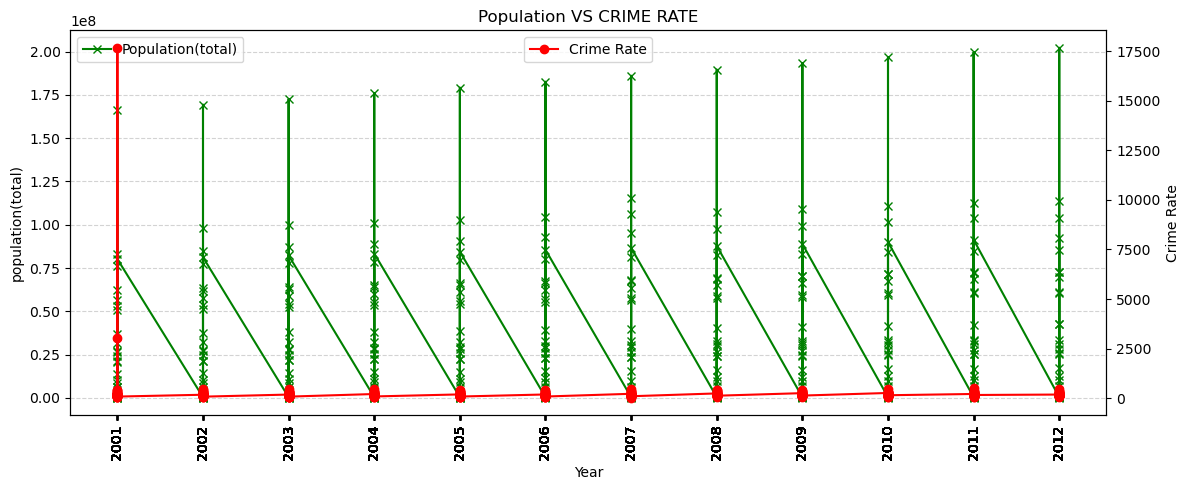

In [60]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Population VS CRIME RATE')
ax.set_xlabel('Year')


plt.savefig('19.jpg')

ax.plot(df['Year'],df['population(total)'], color='green', marker='x')
ax2.plot(df['Year'],df['Crime Rate'], color='red', marker='o')



ax.set_ylabel('population(total)')
ax2.set_ylabel('Crime Rate')
ax.legend(['Population(total)'])
ax2.legend(['Crime Rate'], loc='upper center')
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.savefig('20.jpg')


plt.tight_layout()
plt.show()

In [63]:
tc= df.groupby("State/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending = False)
print("Crime by Each state:\n",tc)

Crime by Each state:
 State/UT
MADHYA PRADESH       2413770
MAHARASHTRA          2273436
TAMIL NADU           2060176
ANDHRA PRADESH       2018981
UTTAR PRADESH        1858074
RAJASTHAN            1855916
KARNATAKA            1481063
KERALA               1437459
GUJARAT              1385775
BIHAR                1346293
WEST BENGAL          1119304
ODISHA                647946
DELHI                 633174
ASSAM                 597764
HARYANA               595303
CHHATTISGARH          561027
JHARKHAND             422351
PUNJAB                384131
JAMMU & KASHMIR       259155
HIMACHAL PRADESH      154948
UTTARAKHAND           103204
PUDUCHERRY             54116
TRIPURA                52734
CHANDIGARH             40807
MANIPUR                35072
GOA                    32051
ARUNACHAL PRADESH      27652
MIZORAM                26146
MEGHALAYA              25249
NAGALAND               13133
A& N ISLANDS            9102
SIKKIM                  7000
D & N HAVELI            4651
DAMAN & DIU 

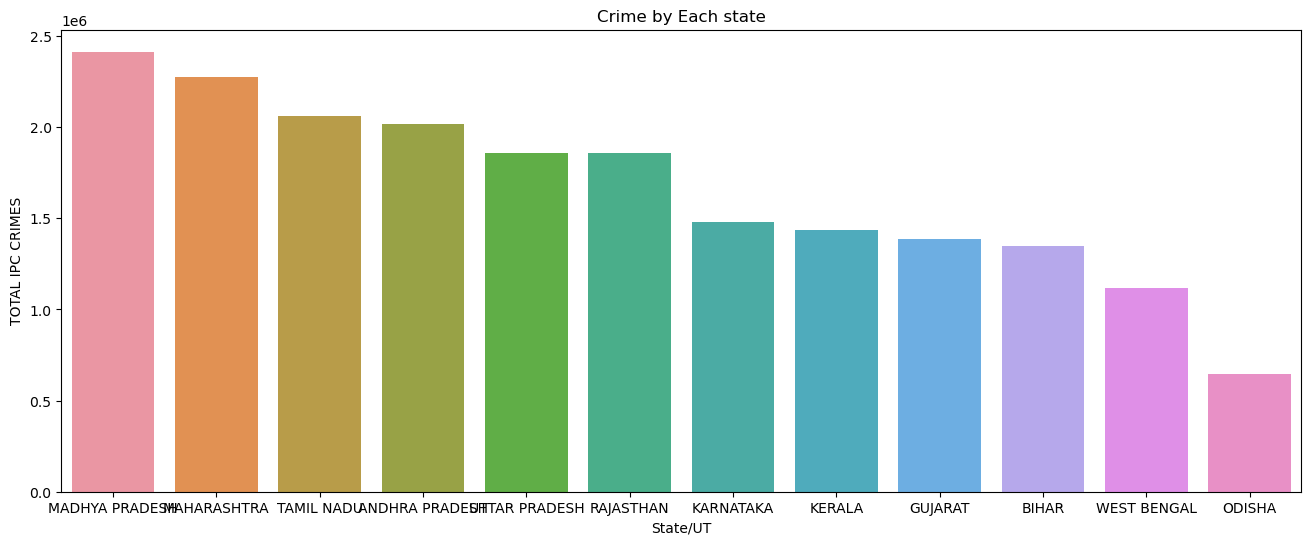

In [64]:
plt.figure(figsize=(16,6))
sns.barplot(x = tc.index[:12], y = tc[:12]).set(title = "Crime by Each state")
plt.savefig('crimebyeachstate.jpg')
plt.show()

In [65]:
tcr= df.groupby("State/UT")["Crime Rate"].sum().sort_values(ascending = False)
print("Crime  Rate  of Each state:\n",tcr)

Crime  Rate  of Each state:
 State/UT
MAHARASHTRA          19655.285754
MADHYA PRADESH        6316.673756
PUDUCHERRY            4869.180671
KERALA                4385.598206
CHANDIGARH            4155.725611
DELHI                 4126.855153
TAMIL NADU            3037.821579
RAJASTHAN             2946.820293
MIZORAM               2661.527940
KARNATAKA             2578.819811
HARYANA               2532.205598
ANDHRA PRADESH        2488.914059
GUJARAT               2478.217328
A& N ISLANDS          2457.210401
CHHATTISGARH          2389.783310
HIMACHAL PRADESH      2386.476742
DAMAN & DIU           2324.749802
GOA                   2276.257698
ARUNACHAL PRADESH     2227.536009
JAMMU & KASHMIR       2100.831570
ASSAM                 2035.844909
D & N HAVELI          1675.369068
ODISHA                1633.077477
TRIPURA               1509.964138
PUNJAB                1463.824145
MANIPUR               1453.769068
BIHAR                 1422.610111
JHARKHAND             1370.455004
WEST BENGA

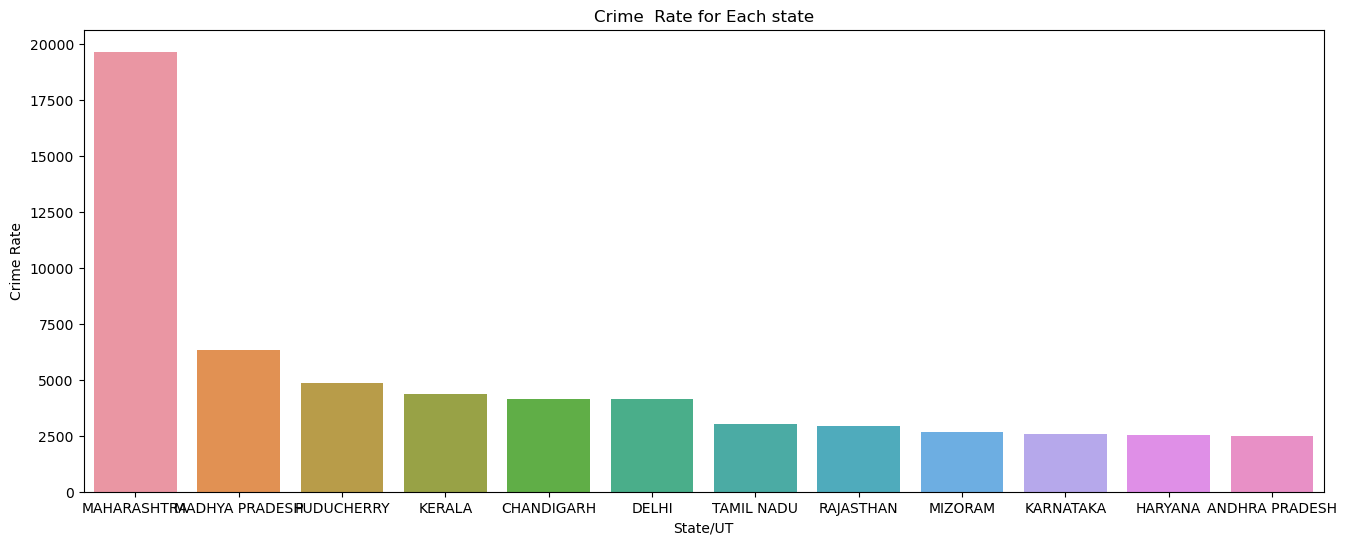

In [66]:
plt.figure(figsize=(16,6))
sns.barplot(x = tcr.index[:12], y = tcr[:12]).set(title = "Crime  Rate for Each state")
plt.savefig('crimeratestate.jpg')
plt.show()